#*CodeWithMe1:Deep Learning with MNIST*

Sébastien Doyez

What is a CNN model?

* CNNs are a type of feed-forward neural network that learn features automatically through kernel optimization. They are widely used for processing various types of data, including text, images, and audio.

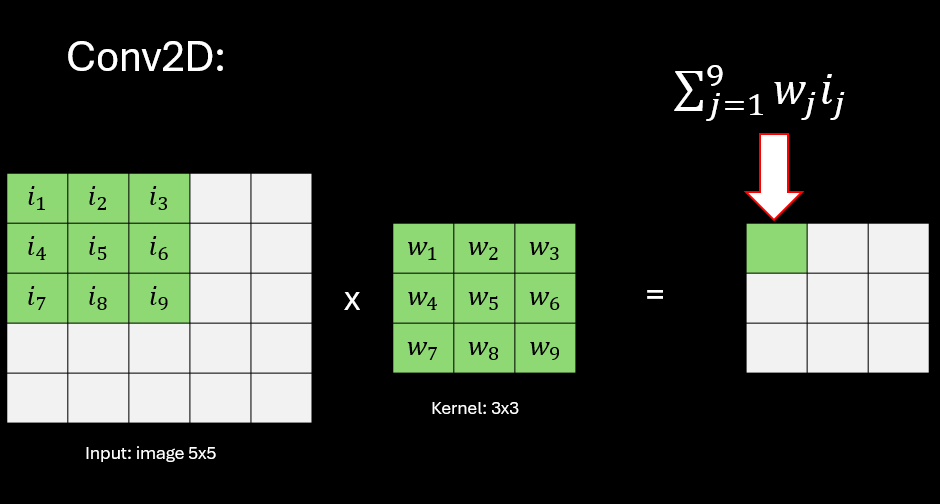

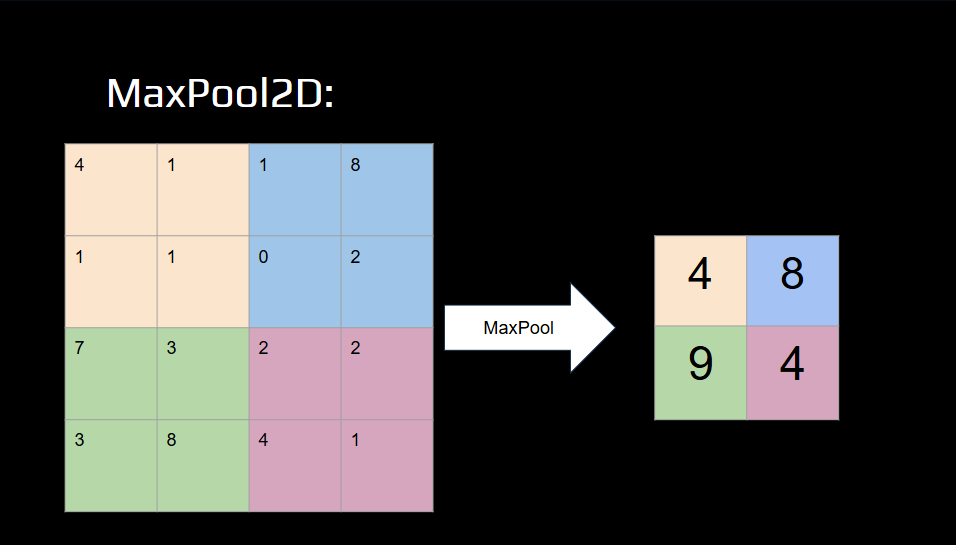

Librairies used:
* Tensorflow


In [2]:
import tensorflow as tf  # Framework for deep learning
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

Loading the dataset MNIST:

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Discover the data:

In [4]:
import matplotlib.pyplot as plt


print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


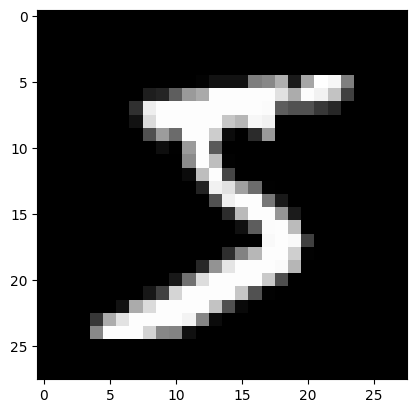

In [5]:
# Show the data:
plt.imshow(x_train[0], cmap= 'gray')
plt.show()

In [6]:
print(f"Label: {y_train[0]}")

Label: 5


In [7]:
print(f"Image: {x_train[0]}")

Image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253

We need to normalize the data.

In [8]:
# 255 because the pixels are on 8 bits => 2^8 - 1 = 255
x_train = x_train/ 255
x_test = x_test/ 255

# Test: print the first image from x_train
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Model Architecture:


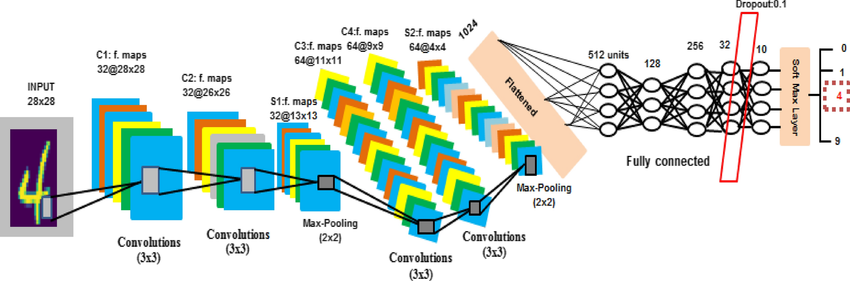

In [9]:
def conv_mp_layer(nb_filters, input):
  """
  DEF:
  do the twos convolutions in a row + maxpool
  """
  x = Conv2D(nb_filters,(3,3), padding='same')(input)
  x = Conv2D(nb_filters,(3,3), padding='same')(x)

  x = MaxPooling2D((2,2))(x)

  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x

def fully_connected(input):
  """
  DEF:
  do the fully connected layers
  """
  fc1 = Dense(512)(input)
  fc2 = Dense(128)(fc1)
  fc3 = Dense(256)(fc2)
  fc4 = Dense(256)(fc3)
  out_drop = Dropout(0.5)(fc4)
  return Dense(10)(out_drop)


def mnist_model(input_shape=(28,28, 1)):

  input = Input(input_shape)
  out_1 = conv_mp_layer(32, input)
  out_2 = conv_mp_layer(32, out_1)

  out_dense = Flatten()(out_2)

  out = fully_connected(out_dense)
  out = Activation('softmax')(out)

  model = Model(input, out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Create a CNN model:

In [10]:
my_model = mnist_model()
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         803,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 998,698 (3.81 MB)

 Trainable params: 998,570 (3.81 MB)

 Non-trainable params: 128 (512.00 B)

Training:

First, we need to convert the y, which are the "right" answer.

to_categorical convert, for example 3 into [0,0,0,1,0,0,0,0,0,0]


The index are [0,1,2,3,4,5,6,7,8,9], so if we have a 1 at the index 4, the "right result is 4.




In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(x_test[0])
print(y_test[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
history = my_model.fit(x_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(x_test, y_test))


469/469 ━━━━━━━━━━━━━━━━━━━━ 210s 435ms/step - accuracy: 0.8802 - loss: 0.5673 - val_accuracy: 0.9808 - val_loss: 0.0623


Now the model is trained

{'accuracy': [0.9421333074569702], 'loss': [0.24897892773151398], 'val_accuracy': [0.9807999730110168], 'val_loss': [0.06232241168618202]}


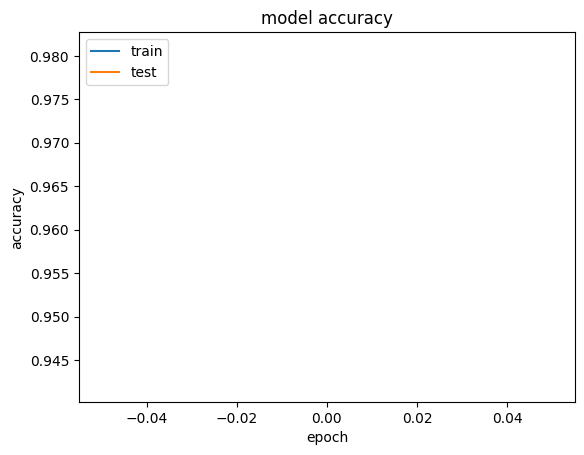

In [14]:
# Good practice: Plot the accuracy and val_accuracy
print(history.history)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
my_model.evaluate(x_test, y_test, verbose=0)

[0.06232237443327904, 0.9807999730110168]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


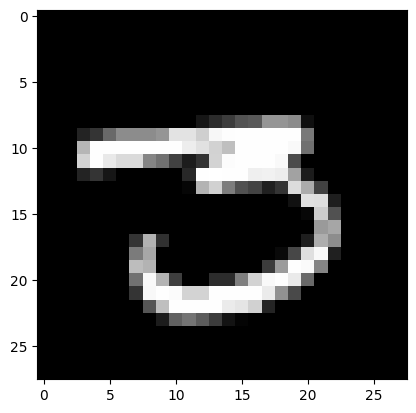

Prediction for the image at index7233: 3
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


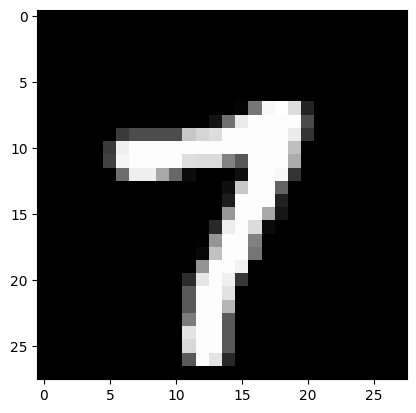

Prediction for the image at index1563: 7
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


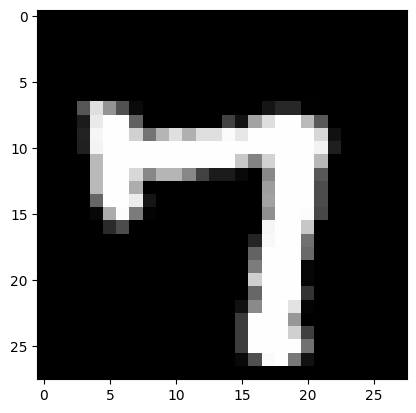

Prediction for the image at index9108: 7
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


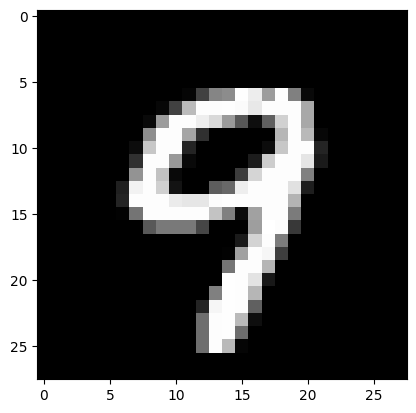

Prediction for the image at index6524: 9
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


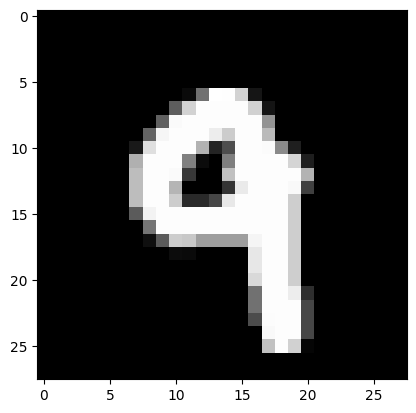

Prediction for the image at index9094: 9
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


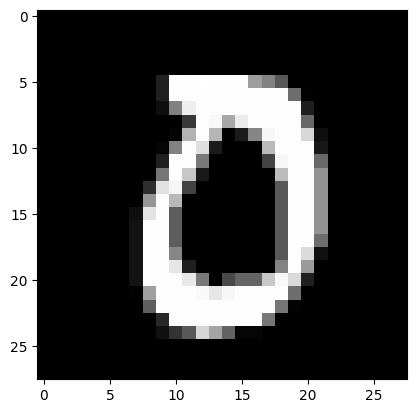

Prediction for the image at index28: 0
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


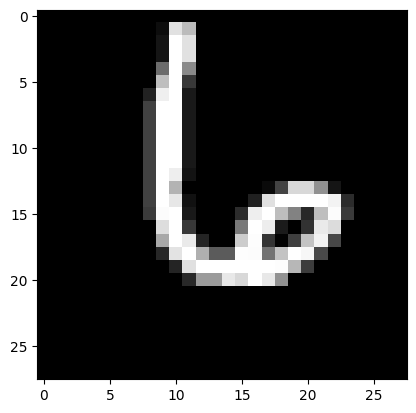

Prediction for the image at index156: 6
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


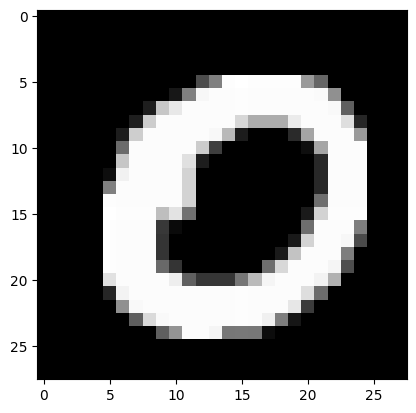

Prediction for the image at index6129: 0
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


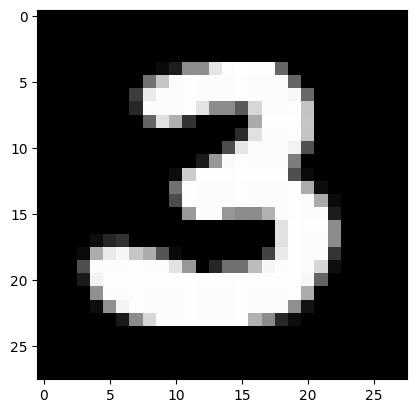

Prediction for the image at index8026: 3
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


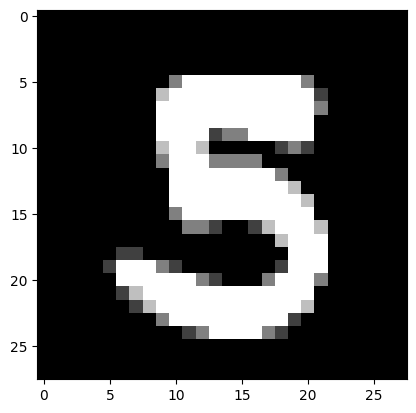

Prediction for the image at index1003: 5
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


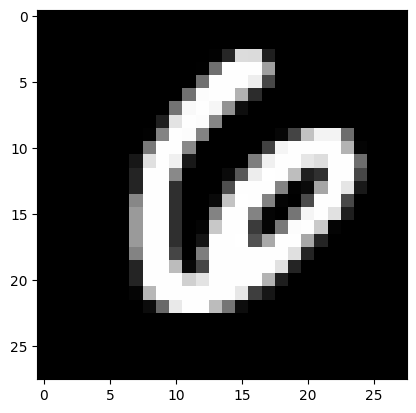

Prediction for the image at index2791: 6
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


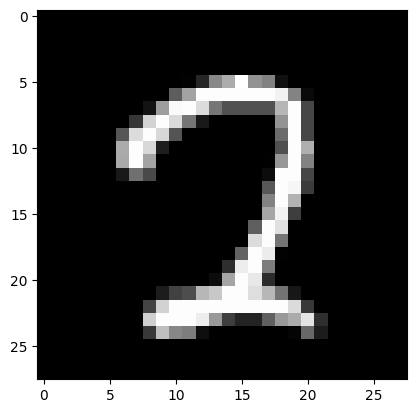

Prediction for the image at index1256: 2
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


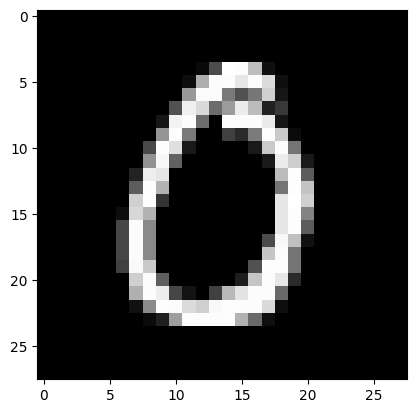

Prediction for the image at index9436: 0
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


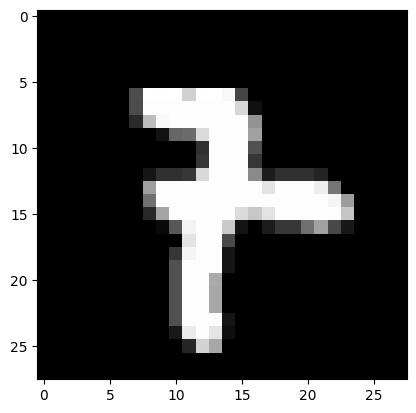

Prediction for the image at index4498: 7
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


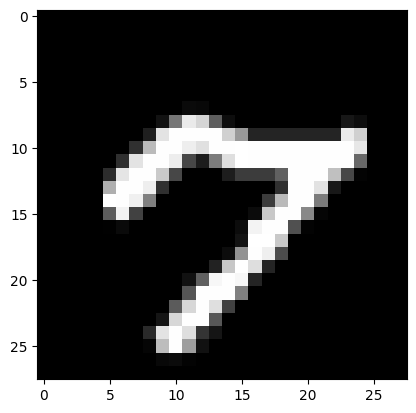

Prediction for the image at index8974: 7
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


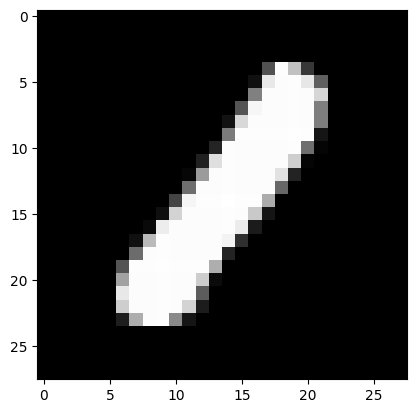

Prediction for the image at index7920: 1
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


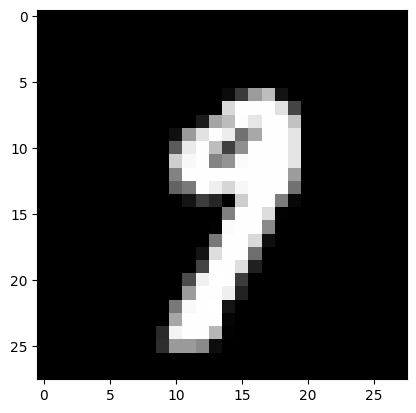

Prediction for the image at index2740: 9
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


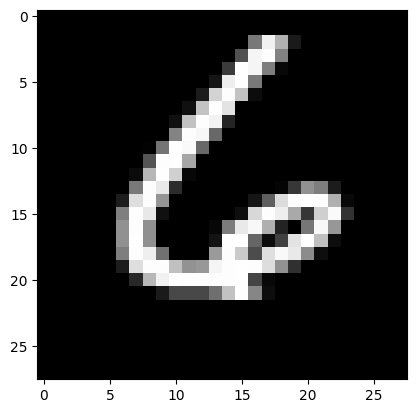

Prediction for the image at index9966: 6
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


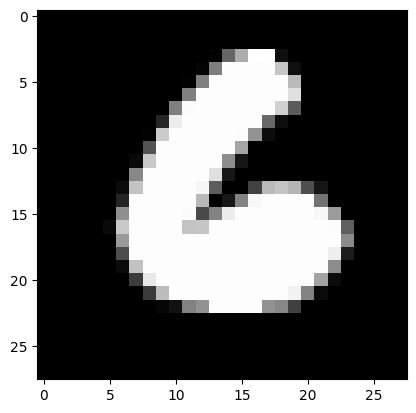

Prediction for the image at index7914: 6
_____________________

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


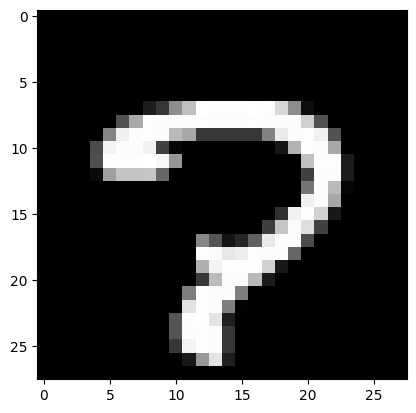

Prediction for the image at index3361: 7
_____________________



In [27]:
import numpy as np

NUMBER_IMG = 20

for i in range(NUMBER_IMG):
    idx = np.random.randint(x_test.shape[0])
    test_data = x_test[idx].reshape((1, 28, 28, 1))
    prediction = my_model.predict(test_data)
    plt.imshow(x_test[idx], cmap='gray')
    plt.show()
    print(f"Prediction for the image at index {idx}: {np.argmax(prediction)}\n_____________________\n")